In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [83]:
X_train.shape 

(50000, 32, 32, 3)

In [84]:
y_train.shape

(50000, 1)

In [85]:
y_test.shape

(10000, 1)

[7]


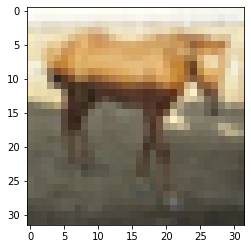

In [86]:
i = 2000
plt.imshow(X_train[i])
print(y_train[i])

C:\Users\HP\Anaconda3\envs\omEnv\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


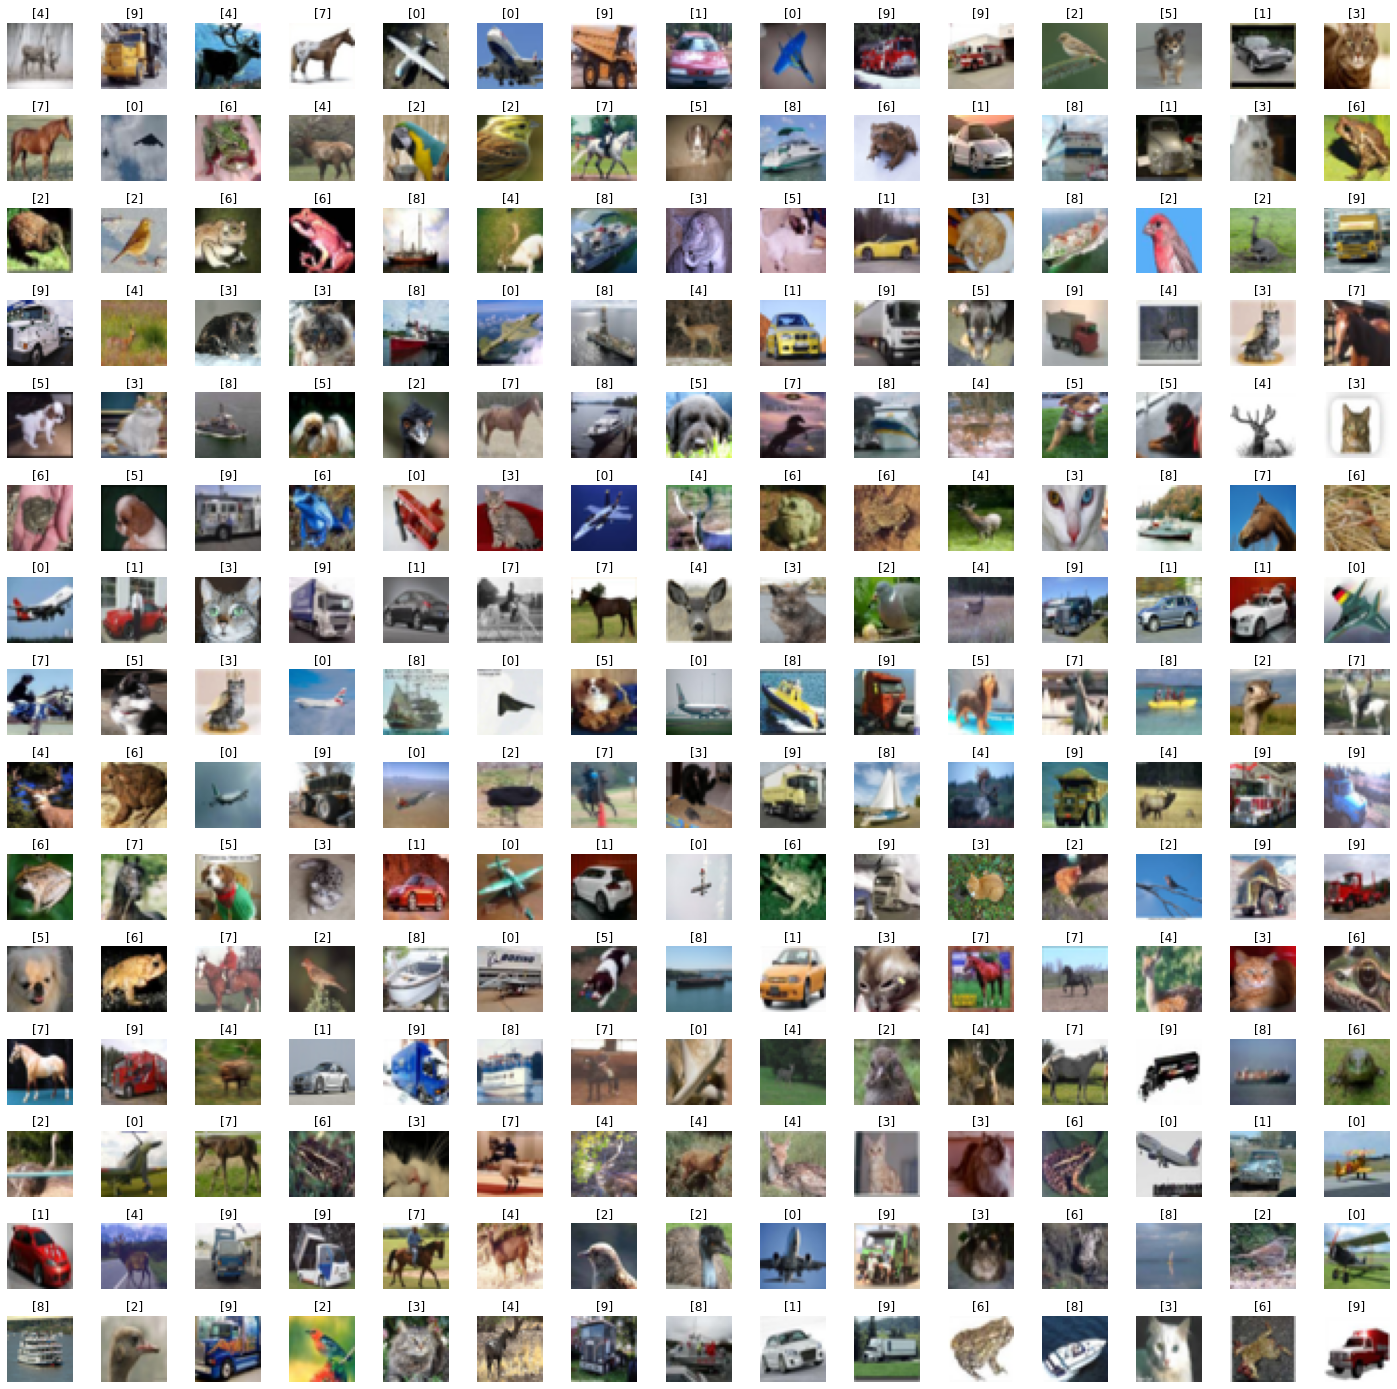

In [87]:
W_grid = 15
L_grid = 15
fig ,axes = plt.subplots(L_grid, W_grid, figsize = (25,25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0,L_grid*W_grid):
    index = np.random.randint(0,n_training) #pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [88]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [89]:
num_cat = 10

In [90]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [91]:
import keras
y_train = keras.utils.to_categorical(y_train,num_cat) #converting into categorical format

In [92]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [93]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]])

In [94]:
import keras
y_test = keras.utils.to_categorical(y_test,num_cat)
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [95]:
X_train = X_train/255 #normalization converting number from (0 to 1) range
X_test = X_test/255

In [96]:
X_test.shape

(10000, 32, 32, 3)

In [97]:
input_shape = X_train.shape[1:]

In [98]:
input_shape

(32, 32, 3)

In [99]:
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , AveragePooling2D , Dense , Flatten , Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [100]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation= 'relu' , input_shape = input_shape))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

In [101]:
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation= 'relu' ))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation= 'relu' ))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

In [102]:
cnn_model.add(Flatten())
cnn_model.add(Dense(units = 512 , activation = 'relu'))
cnn_model.add(Dense(units = 512 , activation = 'relu'))

cnn_model.add(Dense(units = 10 , activation = 'softmax')) #10 units because we have 10 category 
                                                          #softamx is best for binary output


In [103]:
cnn_model.compile(loss = 'categorical_crossentropy' , optimizer = keras.optimizers.rmsprop(lr = 0.001), metrics = ['accuracy'])
history = cnn_model.fit(X_train , y_train , batch_size = 32 , epochs = 1, shuffle = True)

Epoch 1/1
50000/50000 [==============================] - 206s 4ms/step - loss: 1.6130 - accuracy: 0.4117


In [104]:
evaluation = cnn_model.evaluate(X_test,y_test)
print('Test accuracy : {}'.format(evaluation[1]))

10000/10000 [==============================] - 10s 970us/step
Test accuracy : 0.5598999857902527


In [105]:
predicted_class = cnn_model.predict_classes(X_test)
predicted_class

array([3, 8, 8, ..., 5, 4, 7], dtype=int64)

In [106]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [107]:
y_test = y_test.argmax(1) #to get back decimal values which we converted into range(0 yo 1)

In [108]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

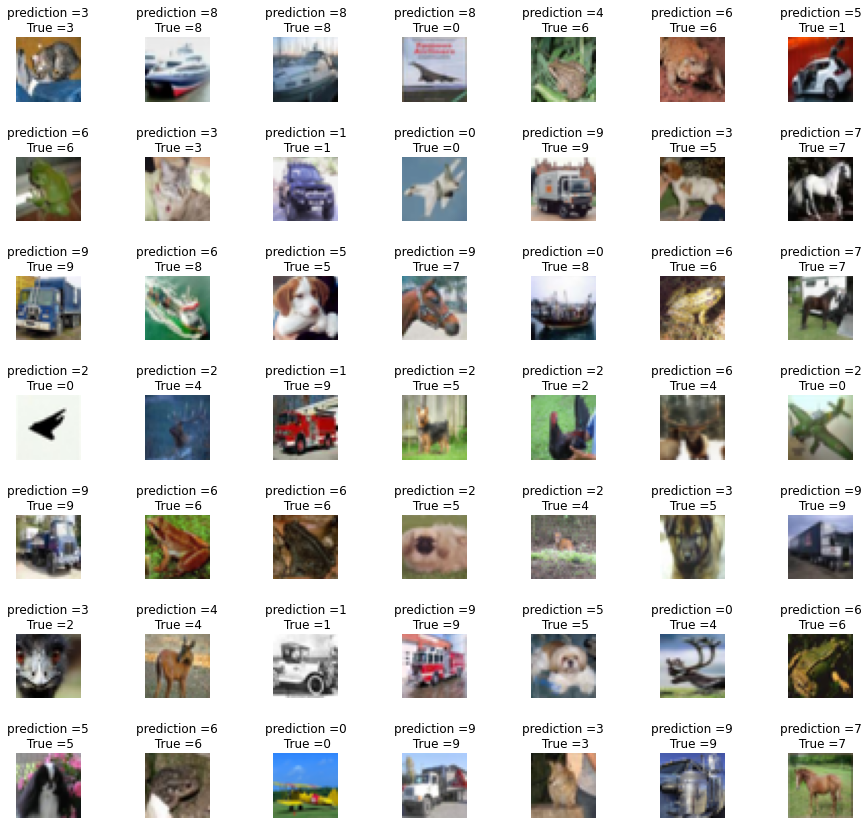

In [109]:
L =7
W =7
fig, axes = plt.subplots(L,W , figsize = (15,15))
axes = axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('prediction ={}\n True ={}'.format(predicted_class[i],y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 1)

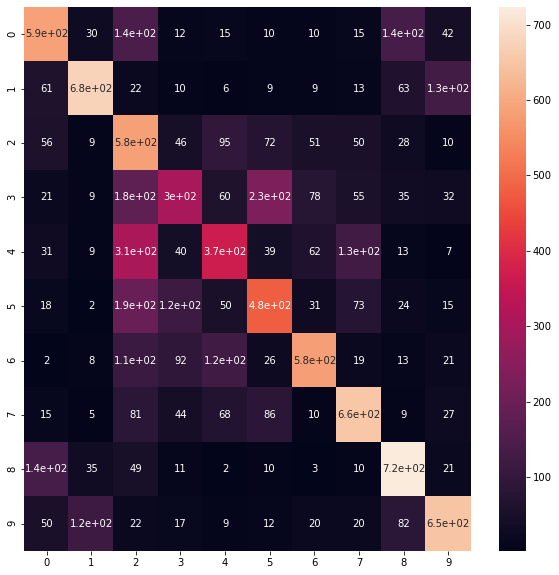

In [110]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test , predicted_class)
cm

plt.figure(figsize = (10,10))
sns.heatmap(cm , annot = True)

In [111]:
import os
directory = os.path.join(os.getcwd(),'saved_models')
if not  os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory,'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

In [32]:
import keras
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test)= cifar10.load_data()

In [33]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [34]:
n = 8
X_train_sample = X_train[:n]

In [35]:
from keras.preprocessing.image import ImageDataGenerator
#dataget_train = ImageDataGenerator(rotation = 90)
#dataget_train = ImageDataGenerator(height_shift_range=0.6)
#dataget_train = ImageDataGenerator(brightness_range=(2,4))
dataget_train = ImageDataGenerator(vertical_flip=True)
dataget_train.fit(X_train_sample)

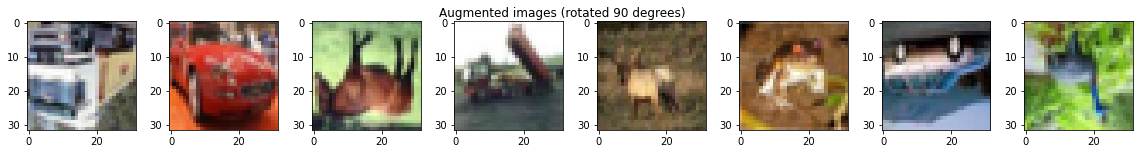

In [36]:
from keras.preprocessing.image import array_to_img

fig = plt.figure(figsize = (20,2))
for X_batch in dataget_train.flow(X_train_sample,batch_size= n):
    for i in range(0,n):
        ax = fig.add_subplot(1,n,i+1)
        ax.imshow(array_to_img(X_batch[i]))
    fig.suptitle('Augmented images (rotated 90 degrees)')
    plt.show()
    break;

In [75]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
                            rotation_range=90,
                            width_shift_range=0.1,
                            vertical_flip=True,
                            )

In [78]:
datagen.fit(X_train)

In [79]:
cnn_model.fit_generator(datagen.flow(X_train,y_train, batch_size = 32),epochs = 1)

Epoch 1/1
1563/1563 [==============================] - 241s 154ms/step - loss: 1.7830 - accuracy: 0.3543


In [112]:
score = cnn_model.evaluate(X_test,y_test)
print('Test accuracy',score[1])

In [113]:
#save the model
directory = os.path.join(os.getcwd(),'saved_models')
if not  os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory,'keras_cifar10_trained_model_augmentation.h5')
cnn_model.save(model_path)
